<a href="https://colab.research.google.com/github/keduog/LLM/blob/main/paravstoken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Language_Model_Training_Overview.xlsx to Language_Model_Training_Overview (2).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

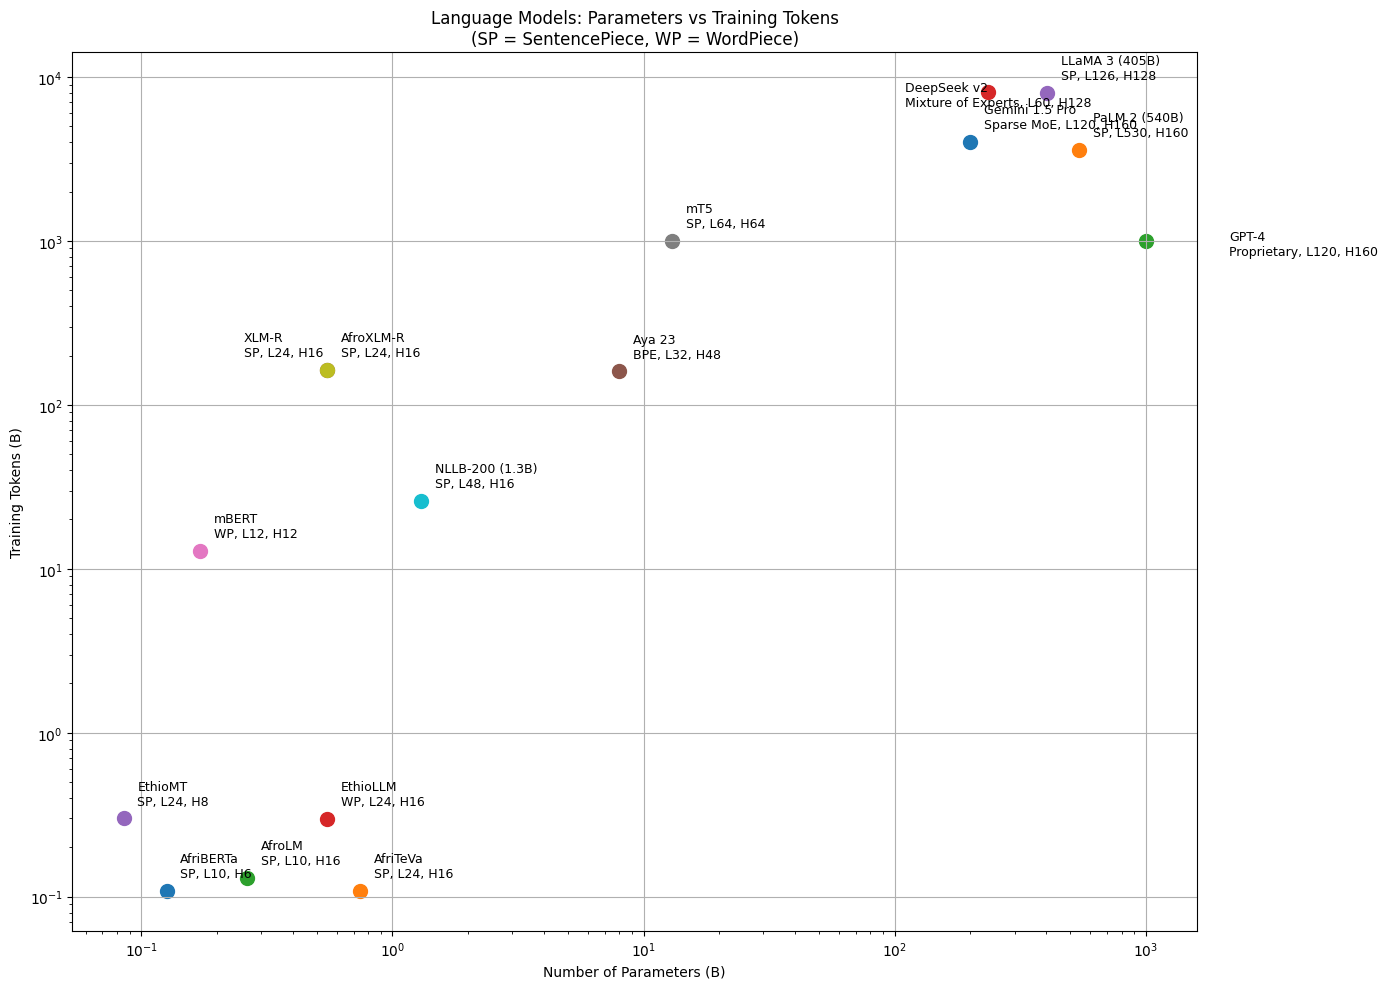

In [4]:
# Step 1: Install necessary libraries
!pip install matplotlib pandas openpyxl

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload the Excel file
uploaded = files.upload()  # Upload when prompted
filename = list(uploaded.keys())[0]

# Step 4: Read the Excel file
df = pd.read_excel(filename)

# Step 5: Parse parameter and token sizes (support M, B, T)
def parse_size(value):
    if isinstance(value, str):
        value = value.strip().upper().replace(",", "")
        if value.endswith('T'):
            return float(value[:-1]) * 1000
        elif value.endswith('B'):
            return float(value[:-1])
        elif value.endswith('M'):
            return float(value[:-1]) / 1000
    try:
        return float(value)
    except:
        return None

df['Parameters_B'] = df['Parameters'].apply(parse_size)
df['Training_Tokens_B'] = df['Training Tokens'].apply(parse_size)

# Step 6: Abbreviate Tokenization method
def abbreviate_tokenization(method):
    if isinstance(method, str):
        if "sentencepiece" in method.lower():
            return "SP"
        elif "wordpiece" in method.lower():
            return "WP"
        else:
            return method
    return ""

df['Tok_Abbrev'] = df['Tokenization Used'].apply(abbreviate_tokenization)

# Step 7: Create annotation labels
df['Label'] = df.apply(
    lambda row: f"{row['Name of the Model']}\n{row['Tok_Abbrev']}, L{row['Layers']}, H{row['Heads']}",
    axis=1
)

# Step 8: Manual offset adjustment for overlapping labels
offsets = {
    "XLM-R": (-60, 10),
    "DeepSeek v2": (-60, -10),
    "LLaMA 3": (10, 10),
    "PaLM 2": (60, 10),
    "GPT-4": (60, -10)
}

# Step 9: Filter and plot
filtered_df = df.dropna(subset=['Parameters_B', 'Training_Tokens_B'])

plt.figure(figsize=(14, 10))
for _, row in filtered_df.iterrows():
    name = row['Name of the Model']
    x, y = row['Parameters_B'], row['Training_Tokens_B']
    label = row['Label']

    dx, dy = offsets.get(name, (10, 10))  # use default offset unless specified

    plt.scatter(x, y, s=100)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(dx, dy),
                 ha='left', fontsize=9)

plt.xlabel("Number of Parameters (B)")
plt.ylabel("Training Tokens (B)")
plt.title("Language Models: Parameters vs Training Tokens\n(SP = SentencePiece, WP = WordPiece)")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()

# Step 10: Save as SVG and auto-download
plt.savefig("model_plot.svg", format="svg")
files.download("model_plot.svg")

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

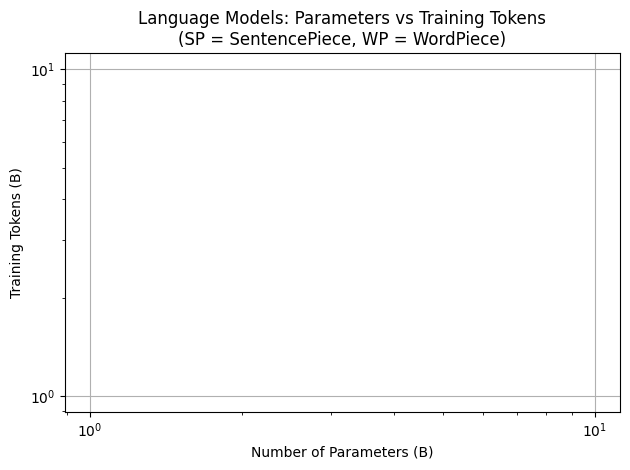

In [3]:
plt.xlabel("Number of Parameters (B)")
plt.ylabel("Training Tokens (B)")
plt.title("Language Models: Parameters vs Training Tokens\n(SP = SentencePiece, WP = WordPiece)")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()

# ✅ Save as SVG and download
plt.savefig("model_plot.svg", format="svg")
files.download("model_plot.svg")

plt.show()
